### Exercise 01 : Line chart with styles
* analyze only the users and not the admins
* analyze only the dates when there were both views and checker commits
* use size of the font should be 8
* the size of the figure is (15,8)

In [1]:
import pandas as pd
import sqlite3

connection = sqlite3.connect("../data/checking-logs.sqlite")

query = "SELECT * FROM pageviews WHERE uid LIKE 'user_%'"
pageviews = pd.io.sql.read_sql(query, connection)
counted_days_p = pd.DataFrame()
counted_days_p["date"] = pd.to_datetime(pageviews["datetime"]).dt.date
counted_days_p = counted_days_p.groupby("date").size().reset_index(name="views")

query = "SELECT * FROM checker WHERE uid LIKE 'user_%'"
pageviews = pd.io.sql.read_sql(query, connection)
counted_days_c = pd.DataFrame()
counted_days_c["date"] = pd.to_datetime(pageviews["timestamp"]).dt.date
counted_days_c = counted_days_c.groupby("date").size().reset_index(name="commits")

df = pd.merge(left=counted_days_p, right=counted_days_c, on="date", how="inner")
df

,date,views,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28
5,2020-04-23,5,43
6,2020-04-25,1,104
7,2020-04-26,8,261
8,2020-04-28,2,5
9,2020-04-29,4,17


<Axes: title={'center': 'Views per day'}, xlabel='date'>

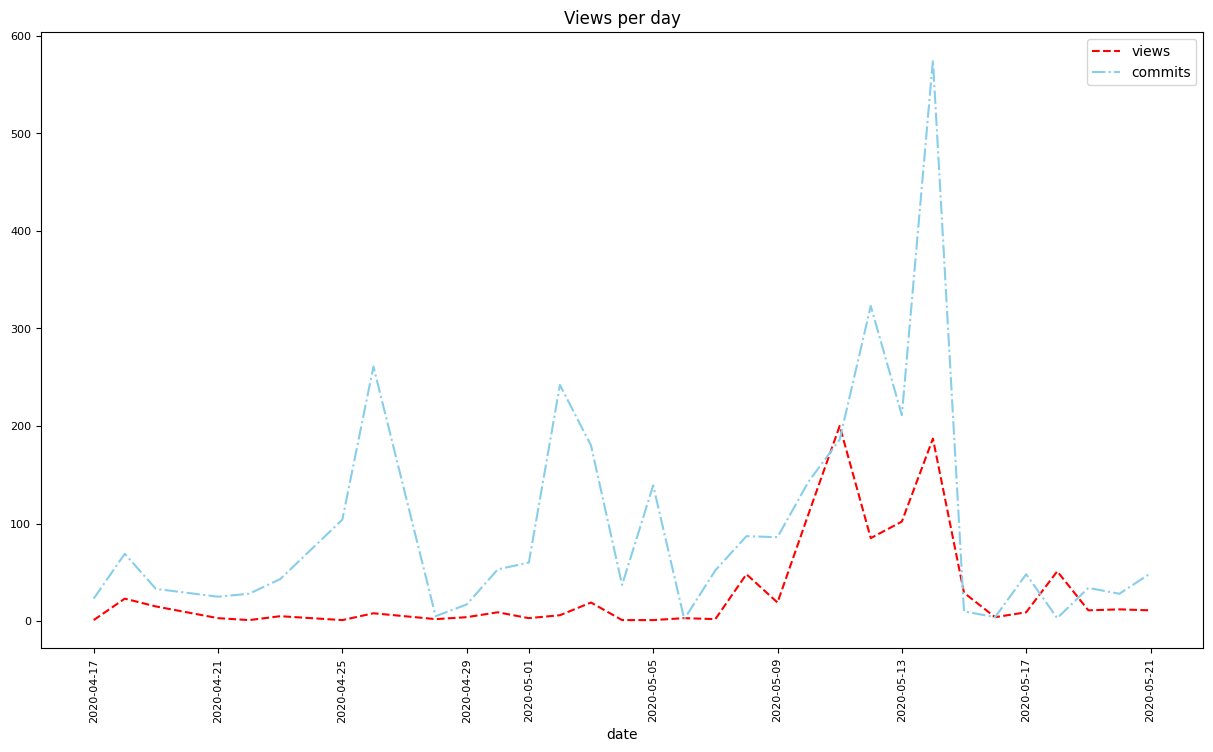

In [2]:
counted_days_p["date"] = pd.to_datetime(counted_days_p["date"])
counted_days_c["date"] = pd.to_datetime(counted_days_c["date"])
df.plot(x = "date", y = ["views", "commits"], fontsize=8, figsize=(15, 8), title="Views per day", rot=90, color=["red", "skyblue"], style=["--", "-."] )

* at the end of your Jupyter Notebook create a markdown cell and insert the question:
“How many times was the number of views larger than 150?” Insert: “The answer
is ___”. Put the number in the text instead of the underline.

How many times was the number of views larger than 150?

In [3]:
print(f"The answer is {int(df[df["views"] > 150]["views"].count())}")

The answer is 2


In [4]:
connection.close()